# Data augmentation to address overfitting 2.


In [111]:
#import paskages
import os
import cv2
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [112]:
#Load data
path='data/flower_photos/'
data_dir = pathlib.Path(path)
data_dir

WindowsPath('data/flower_photos')

In [113]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [114]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [115]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [116]:
X = np.array(X)
y = np.array(y)

In [117]:
size = len(X)
#size_test = int(size / 10)
size

3670

In [120]:
size_test = 370  # 10% of the data
training_data = X[size_test:]
training_labels = y[size_test:]
testing_data = X[:size_test]
testing_labels = y[:size_test]


3300

In [122]:
training_data = np.array(training_data)
training_labels = np.array(training_labels)
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)
# Data augmentation configuration for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation configuration for validation data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow(
    training_data,
    training_labels,
    batch_size=20,
    shuffle=True,
    seed=42
)

# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow(
    testing_data,
    testing_labels,
    batch_size=20,
    shuffle=False
)

In [123]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),  # Update the input shape
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])


In [125]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [126]:
history = model.fit(
      train_generator,
    #  steps_per_epoch=50,# 100        # 2000 images = batch_size * steps
      epochs=20, #20
      validation_data=validation_generator,
     # validation_steps=5, #50         # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
165/165 - 158s - loss: 1.7229 - accuracy: 0.5064 - val_loss: 2.3636 - val_accuracy: 0.0081 - 158s/epoch - 955ms/step
Epoch 2/20
165/165 - 158s - loss: 1.0205 - accuracy: 0.6239 - val_loss: 1.6974 - val_accuracy: 0.0405 - 158s/epoch - 958ms/step
Epoch 3/20
165/165 - 157s - loss: 0.9047 - accuracy: 0.6624 - val_loss: 2.3000 - val_accuracy: 0.1000 - 157s/epoch - 953ms/step
Epoch 4/20
165/165 - 160s - loss: 0.8786 - accuracy: 0.6794 - val_loss: 1.4592 - val_accuracy: 0.1405 - 160s/epoch - 967ms/step
Epoch 5/20
165/165 - 157s - loss: 0.8401 - accuracy: 0.6903 - val_loss: 1.5382 - val_accuracy: 0.1351 - 157s/epoch - 949ms/step
Epoch 6/20
165/165 - 157s - loss: 0.8098 - accuracy: 0.6967 - val_loss: 1.9828 - val_accuracy: 0.0514 - 157s/epoch - 954ms/step
Epoch 7/20
165/165 - 157s - loss: 0.7911 - accuracy: 0.7097 - val_loss: 1.6694 - val_accuracy: 0.1811 - 157s/epoch - 949ms/step
Epoch 8/20
165/165 - 156s - loss: 0.7628 - accuracy: 0.7197 - val_loss: 1.7946 - val_accuracy: 0.1432 - 

In [127]:
def plot_graphs( history , string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()   

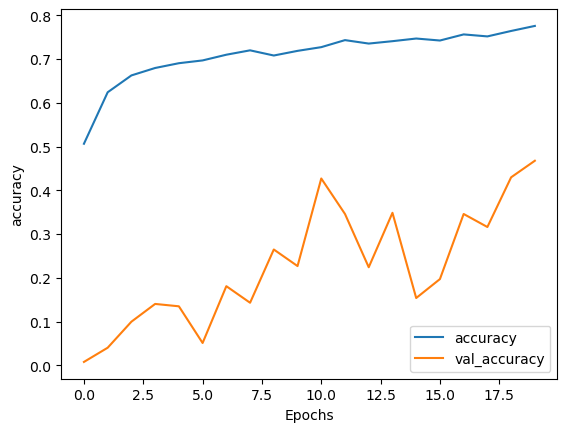

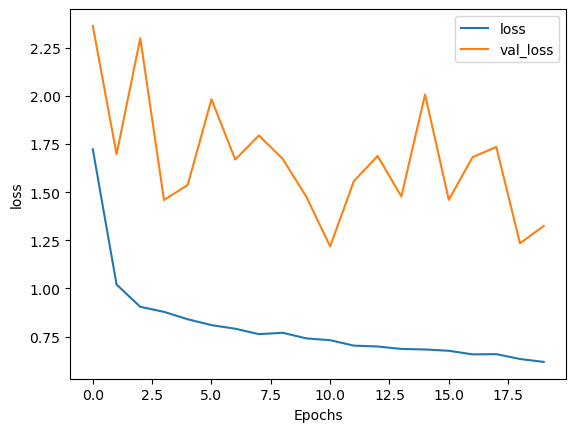

In [128]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")